### SUBDUCTION ZONES AND THE WHOLE EARTH WATER CYCLE.
***
#### Quick start guide.
- Advance through code blocks by either clicking the **"Run"** button above or pressing **"shift" + "enter"** keys.

- Text written after hashtags (#) indicate comments or instructions.

- You can change the values in the next block of code and see how the results vary.

- When you change a value you need to advance through all of the code blocks again.

- Some blocks are required for coding, if you are not interested in *Python*, you do not have to read the details.

- These blocks have a comment at the top that reads **##CODING SECTION------**

- Have fun!
<br>
#### Prerequisites.
- Familiarity with the theory of **plate tectonics** and the principles of **subduction**.

- An understanding of **scientific notation** and **unit conversion**.
<br>
#### Learning Goals.
- Gain inisght into the natural variables that control the Earth's long term **water cycle**.
- Understand how to perform **estimation** with very large values.
- Learn basic principles of coding in ***Python*** and how to use **Jupyter Notebooks**.<pre>
    - Mathematical operators are easy in *Python*: +,  -,  \*,  /,  \*\*,  ( ) 
    - Sympols correspond to addition, subtraction, multiplication, division, exponent, and parentheses.</pre>

##### To start we need to create variables that contain our assumptions and constants.

##### In this next block we define our assumed values, variables, and constants.

##### These values can be changed by the user

In [150]:
##ASSUMED VALUES AND CONSTANTS-------------

#this block of code sets the variables we need for all of the calculations
#it is separated into the two main parts of the calculation
#once you have gone through the code you can come back and change any of the values after the equals (=) signs
#but will need to run the code blocks again

##----------subduction inputs--------------
#to calculate how much water enters subduction zones

subduction_length = 50000      #kilometers along which subduction occurs (km)
subduction_thickness = 10      #thickness of water-bearing rocks being subducted in kilometers (km)
subduction_rate = 5            #subduction rate in centimeters per year (cm/yr)
subduction_hydration = 5       #weight percent of water in subducted rocks (%)
subduction_density = 3000      #density of subducted rocks in kilograms per cubic meter (Kg/m^3)


##----------earth & ocean properties------
#to calculate the amount of water within the ocean and the mantle

earth_radius = 6400            #radius of earth in kilometers (km)
ocean_depth = 3.7              #depth of ocean in kilometers (km)
ocean_floor = 70               #percent of earths surface covered by oceans (%)
ocean_density = 1000           #density of water in oceans in kilograms per cubic meter (Kg/m^3) 

#### Convert to consistent Units.
- We need to make sure that all of the variables have the same units.

- Our standard units for this exercise will be meters, kilograms, and years.

- Any variable expressed as a percent above needs to be changed into a fraction ( fraction = percent / 100).

- Doing this conversion now makes for less hassle later, and much simpler code.

In [151]:
##CONVERSION CONSTANTS---------
km2m = 1000      #km to meter
cm2m = 0.01       #centimeter to meter
p2f = 0.01        #percent to fraction
pi = 3.14        #value of pi to 3 digits; used later when we calculate ocean volume
##------------------------------
##-----CONVERT TO LIKE UNITS----
## To do this we can update the variables we already defined by multiplying them by our conversion constants
##you can check this by performing the calculation on a piece of scratch paper

subduction_length = subduction_length * km2m           #change kilometer to meter
subduction_thickness = subduction_thickness * km2m     #change kilometer to meter
subduction_rate = subduction_rate * cm2m               #change centimeters per year to meters per year
subduction_hydration = subduction_hydration * p2f      #change hydration percent to mass fraction

earth_radius = earth_radius * km2m                         #change kilometer to meter
ocean_depth = ocean_depth * km2m                           #change kilometer to meter
ocean_floor = ocean_floor * p2f                            #change ocean coverage percent to area fraction

In [152]:
##CODING SECTION----------------------------------------------

#Python is modular, so we need to load certain packages to be able to perform tasks.
#To be able to make graphs we need to import the matplotlib.pyplot package.
#We also import a few add ons that let us draw common shapes
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon, Wedge, Rectangle
##------------------------------------------------------------

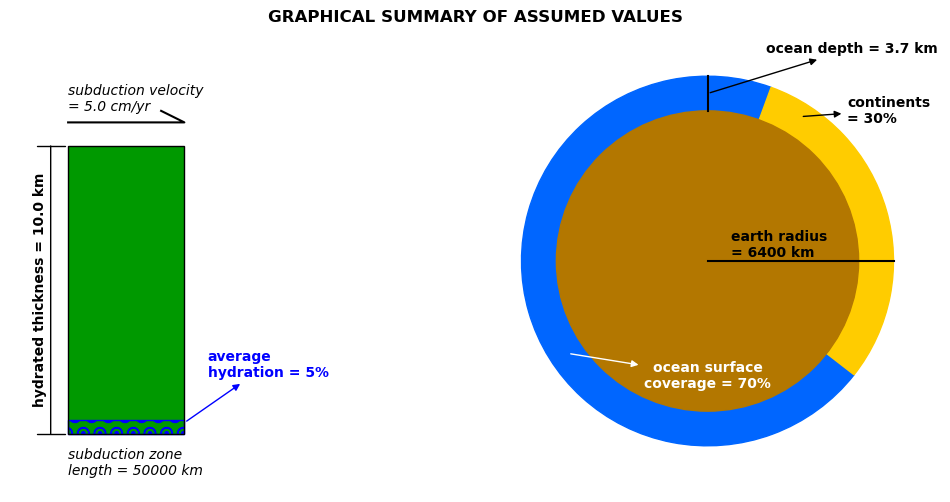

In [153]:
##CODING SECTION----------------------------------------------
#this block of code creates a graphical representation of our assumptions

#to start we need to define the text that we want to be printed on the screen.
#importantly, some of the text is dependent on the variables we have defined above.
#we create varaibles that hold the text, and we can pass our defined values into these variables.
#within each of the text sections below the area between the brackets {} is where we our defined values will be entered.
#some of the text blocks have "\n". This indicates a line break.
length_an = 'subduction zone\nlength = {} km'
thickness_an = 'hydrated thickness = {} km'
rate_an = 'subduction velocity\n= {} cm/yr'
hydration_an = 'average\nhydration = {}%'
radius_an = 'earth radius\n= {} km'
depth_an = 'ocean depth = {} km'
crust_an = 'continents\n= {}%'
floor_an = 'ocean surface\ncoverage = {}%'


## We next define the shapes we want to plot in our figure, we will create two shapes:
# 1. a rectangle to illustrate our subducting material
# 2. a circle to illustrate our earth
#Certain parts of these shapes are updated if we change our variables. Can you what parts of the shapes change?

#different components of our subduction rectangle
#Rectangle((bottom left coordinates), width, height, facecolor, edgecolor, hatch)
subd = Rectangle((2.5,2.5), 5, 12.5, facecolor='#009900') #green rectangle, bottom left corner at x,y = 2.5,2.5
subdh = Rectangle((2.5,2.5), 5, 12.5*subduction_hydration,
                  facecolor='None', edgecolor='blue', hatch='O.') #blue circles that define the hydration percent
subo = Rectangle((2.5,2.5), 5, 12.5, facecolor='None', edgecolor='black') #outline the rectangle with a black line

#various parts of the earth circle
#Wedge((center), radius, start angle (deg), end angle (deg), color)
ocean = Wedge((30,10), 8, 70, 70+ocean_floor*360, color='#0066ff') #the outer layer of earth that contains water
crust = Wedge((30,10), 8, 70+ocean_floor*360, 70, color='#ffcc00') #the outer layer of earth that is continents
earth = Circle((30,10), 6.5, color='#b37700') #the interior of the earth, color is defined by a HEX code

#here we create the axes of our figure, and set the size.
#it is a rectangle that is twice as wide as it is tall
fig, ax = plt.subplots(figsize = (12,6))
ax.axis([0, 40, 0, 20]) #set the x and y axes: x from 0 to 40, y from 0 to 20

#here we pass our shapes (defined above) into the figure so they plot
plt.gca().add_artist(ocean)
plt.gca().add_artist(crust)
plt.gca().add_artist(earth)
plt.gca().add_artist(subd)
plt.gca().add_artist(subdh)
plt.gca().add_artist(subo)

#we add some lines on the figure
plt.plot([30,38], [10,10], color='black') #Earth radius line
plt.plot([30,30], [16.5,18], color='black') #ocean depth line
plt.plot([2.5, 7.5, 6.5], [16,16,16.5], color='black') #subduction velocity arrow

#we also add text, using the text snippets defined above, and pass our defined values into the text
plt.text(31,10.2, radius_an.format(int(earth_radius/km2m)), weight='bold')
plt.text(1,8.75, thickness_an.format(subduction_thickness/km2m),va='center',rotation=90, weight='bold')
plt.text(2.5,16.5, rate_an.format(subduction_rate/cm2m),ha='left',rotation=0, style = 'italic')
plt.text(2.5, 0.75, length_an.format(int(subduction_length/km2m)), ha='left', style = 'italic', weight='light')

#these annotations add text and arrows at the same time, and we can change the arrow type
ax.annotate(depth_an.format(ocean_depth/km2m), weight='bold', xy=(30,17.25), xytext = (32.5, 19), 
            ha='left', arrowprops=dict(arrowstyle='<|-', color='black'))
ax.annotate(crust_an.format(int(100-ocean_floor/p2f)), weight='bold', xy=(34,16.25), xytext = (36, 16), 
            ha='left', arrowprops=dict(arrowstyle='<|-', color='black'))
ax.annotate(floor_an.format(int(ocean_floor/p2f)), color='white', weight='bold', xy=(24,6), xytext = (30,4.5), 
            ha='center', arrowprops=dict(arrowstyle='<|-', color='white'))
ax.annotate('', xy=(1.75,2.4), xytext = (1.75, 15.1), arrowprops=dict(arrowstyle='|-|', color='black'))
ax.annotate(hydration_an.format(int(subduction_hydration/p2f)), weight='bold', xy=(7.5,3), 
            xytext = (8.5, 5), ha='left', color='blue', arrowprops=dict(arrowstyle='<|-', color='blue'))

#add a nice title
plt.title('GRAPHICAL SUMMARY OF ASSUMED VALUES', variant='small-caps',weight='bold')

#turn off the x and y axes so they do not show up
plt.axis('off')

#view our nice plot
plt.show()

***
$\mathbf{\text{1. CALCULATE MASS OF WATER SUBDUCTED PER YEAR}}$
***
Where the full equation is:<br>
<br>
&emsp;$W_{flux}=T_{crust}*\rho_{crust}*L_{sub}*V_{sub}*X_{H2O}$<br>
<br>
&emsp;&emsp;units: $\frac{Kg_{H2O}}{yr}=\frac{m}{}*\frac{Kg_{rock}}{m^3}*\frac{m}{}*\frac{m}{yr}*\frac{Kg_{H2O}}{Kg_{rock}}$
<br>
<br>
This can be understood more easily if we break it into pieces:

1a.&emsp;Calculate mass of single column of hydrated crust:<br> 
<br>
&emsp;&emsp;$M_{column}=T_{crust} * \rho_{crust}$<br>
<br>
&emsp;&emsp;where:&emsp;${\scriptstyle T_{crust}=crustal\, thickness \, (m),}$
    &emsp;&emsp;${\scriptstyle \rho_{crust}=crustal\, density\, (Kg/m^3)}$
    
&emsp;&emsp;units: $\frac{Kg}{m^2}=\frac{m}{} *\frac{Kg}{m^3}$
    
1b.&emsp;Calculate mass subducted per meter of convergence:<br> 
<br>
&emsp;&emsp;$M_{sub}=M_{column} * L_{sub}$<br>
<br>
&emsp;&emsp;where:&emsp;${\scriptstyle L_{sub}=length\, of \, subduction \, zones\, (m),}$
    
&emsp;&emsp;units: $\frac{Kg}{m}=\frac{Kg}{m^2} *\frac{m}{}$
    
1c.&emsp;Calculate mass flux subducted per year:<br> 
<br>
&emsp;&emsp;$M_{flux}=M_{sub} * V_{sub}$<br>
<br>
&emsp;&emsp;where:&emsp;${\scriptstyle V_{sub}=subduction\, rate \, (m/yr),}$
    
&emsp;&emsp;units: $\frac{Kg}{yr}=\frac{Kg}{m} *\frac{m}{yr}$
    
1d.&emsp;Calculate water flux subducted per year:<br> 
<br>
&emsp;&emsp;$W_{flux}=M_{flux} * X_{H2O}$<br>
<br>
&emsp;&emsp;where:&emsp;${\scriptstyle X_{H2O}=H2O\, mass \, fraction \,(Kg_{H2O}/Kg_{rock}),}$
    
&emsp;&emsp;units: $\frac{Kg_{H2O}}{yr}=\frac{Kg_{rock}}{yr} *\frac{Kg_{H2O}}{Kg_{rock}}$

In [154]:
#following the equations shown above we work through the calulation and view our results.

#1a mass of single column of hydrated crust
subduction_unit_mass = subduction_thickness * subduction_density

#1b mass subducted globally for every meter of convergence
subduction_mass = subduction_unit_mass * subduction_length

#1c mass subducted globally per year
subduction_mass_flux = subduction_mass * subduction_rate

#1d mass of water subducted each year
subduction_water_flux = subduction_mass_flux * subduction_hydration



##CODING SECTION--------------------------------------------
#We want to print out our calculated values, but we want to include other details. The red sections below are 
#predefined text, but we can pass our calculated values into the text using the percent symbols (%).
#the letters and numbers right after the percent tell the code how to report the values
#for example %10.2E is two decimal place scientific notation
# and %3d means we will show up to three digits before the decimal
# lastly, %3.1f means we will print one value after the decimal
# After the red text we define what values we want to replace the percent symbols within the text, commas separate
#the values
print('1a. column mass = %10.2E (kg/m\u00B2)   -->   a 10km thick column of rock weighs %3d million kilograms!\n\n\
1c. mass subducted globally per year = %10.2E (kg/yr)   -->   that equals %3d trillion kilograms!\n\n\
1d. water subducted globally per year = %10.2E (kg H\u2082O/yr)   -->   %3.1f trillion kilograms of water!'
%(subduction_unit_mass, subduction_unit_mass/1e6,
  subduction_mass_flux, subduction_mass_flux/1e12,
  subduction_water_flux, subduction_water_flux/1e12))
##---------------------------------------------------------

1a. column mass =   3.00E+07 (kg/m²)   -->   a 10km thick column of rock weighs  30 million kilograms!

1c. mass subducted globally per year =   7.50E+13 (kg/yr)   -->   that equals  75 trillion kilograms!

1d. water subducted globally per year =   3.75E+12 (kg H₂O/yr)   -->   3.8 trillion kilograms of water!


In [155]:
####USER CALCULATION----------------------------------

#Those are big numbers!
#We can do a unit conversion to make this value more easy to understand

# replace the zeros with the correct values:

# How many days are there in a year?
day_per_year = 1

# How many hours in a day?
hr_per_day = 1

# How many minutes in one hour?
min_per_hr = 1

# how many seconds are there in a minute?
sec_per_min = 1

sec_per_year = day_per_year * hr_per_day * min_per_hr * sec_per_min

water_per_sec=subduction_water_flux / sec_per_year
print('%4.0f kilograms per second!'%(water_per_sec))

##CODING SECTION-------------------------------------
# A little loop that checks the results.
# This is an "if loop":
# If the calculated value is too low it triggers the first statement, 
# If on the other hand (else-if, "elif") the value is too high it triggers the second statement
# Lastly, if everything is hunky-dory the statement triggers the last statement.
if water_per_sec > subduction_water_flux / 31530000:
    print('\nWhoa, that seems too high, check your values')
elif water_per_sec < subduction_water_flux / 31560000:
    print('\nWhoa, that seems too low, check your values')
else: 
    print('\nseems about right!')

3750000000000 kilograms per second!

Whoa, that seems too high, check your values


In [156]:
##------------------------------------------OPTIONAL CALCULATION-------------------------------
#Can you think of something to compare this to? 
#Kilograms of water per second converted to: 
#Olympic swimming pools: (2,500 cubic meters of water per pool)
#Elephants: (~1,000 kilograms per Elephant?)
#Honda Civics: (1,330 kilograms per Civic)
#Grains of rice: (0.016 grams per grain)
#Be sure to double check your units!!!!
#When you have your final value, output it by writing "print(your_variable_name)"
#You can add text after your variable by including it it quotes and separating with a comma

your_variable_name = 10*50*30*100/2345

print(your_variable_name, "is my fake value")


639.6588486140724 is my fake value


***
$\mathbf{\text{2. CALCULATE MASS OF WATER IN EARTHS OCEANS}}$
***
Starting with the equation for the volume of a sphere:<br>
<br>
&emsp;$V_{sphere}=\frac{4}{3} *\pi *r^3$<br>
<br>
We calculate the volume of a spherical shell with a thickness equal to earths average ocean depth:<br>
<br>
&emsp;$V_{shell}=V_{earth}-V_{earth-ocean}=\frac{4}{3}\pi(r_{e}^3-r_{e-o}^3)$<br>
<br>
&emsp;&emsp;where:&emsp;${\scriptstyle r_{e}=earth \, radius \, (m),}$
    &emsp;&emsp;${\scriptstyle r_{e-o}=earth \, radius \, minus \, ocean \, depth \, (m),}$<br>
<br>
From which we can determine the volume and mass of the earths oceans:<br>
<br>
&emsp;$V_{ocean}=V_{shell}*A_{ocean}$&emsp;&emsp;and&emsp;&emsp;$M_{ocean}=V_{ocean}*\rho_{sw}$<br>
<br>
&emsp;&emsp;where:&emsp;${\scriptstyle A_{ocean}=fractional\, surface\, area\, of\, oceans,}$
    &emsp;&emsp;${\scriptstyle \rho_{sw}=density \, of \, sea \, water \, (Kg/m^3),}$<br>

In [157]:
r1 = earth_radius #earth radius
r2 = earth_radius - ocean_depth #radius of earth minus ocean depth
Vshell = 4/3 * pi * (r1**3 - r2**3) #volume of shell of water around globe

Vocean = Vshell * ocean_floor #volume of oceans if they cover 70% of the globe surface

Mocean = Vocean * ocean_density # Mass of oceans given an assumed density of seawater equal to 1000 km/m3
print('Earth Ocean Volume = %10.2E (m\u00B3)\nEarth Ocean Mass = %10.2E (kg)'%(Vocean, Mocean))

Earth Ocean Volume =   1.33E+18 (m³)
Earth Ocean Mass =   1.33E+21 (kg)


***
$\mathbf{\text{3. CALCULATE HOW LONG IT TAKES TO SUBDUCT THE OCEANS}}$
***
This is done simply by dividing the ocean mass by the loss of water into subduction zones:<br>
<br>
&emsp;$t_{ocean}=\frac{M_{ocean}}{W_{flux}}$<br>

In [100]:
t_ocean_subduction = Mocean / subduction_water_flux
print( 'time required to subduct the ocean = %3d million years'%(t_ocean_subduction/1e6))

time required to subduct the ocean = 355 million years


***
$\mathbf{\text{4. EXTENDING TO "DEEP TIME": SUBDUCTION THROUGH THE AGES}}$
***
- In part 1 we identified important parameters that influence the subducted water cycle

- We will now repeat the calculations using data obtained from peer-reviewed sources

- Specifically we want to understand how water subduction may have been different in the past 225 million years

- We are also gain some experience with graphs in this section

In [101]:
#Here we are loading pthon packages that we will use for plotting
#Do not change this code block

import numpy as np #package to let us create and manipulate grids of data

In [132]:
age_real = np.arange(230, 0, -10)
rate_real = np.array([5.9, 4.0, 3.8, 4.2, 4.1, 5.9, 6.7, 5.3,
                8.2, 8.5, 10.4, 10.9, 7.9, 7.7, 4.7, 3.9, 
                4.9, 4.1, 3.3, 4.0, 4.5, 4.7, 4.2]) #extrapolated from Young et al., (2019; Geosc. Frontiers 10)
length_real = np.array([67294.5, 69717.7, 71800.2, 73542.1, 74943.4, 
                76004.0, 76724.1, 77103.4, 77142.2, 76840.3, 
                76197.8, 75214.6, 73890.8, 72226.4, 70221.3,
                67875.6, 65189.3, 62162.3, 58794.7, 55086.5,
                51037.6, 46648.1, 41917.9]) #Polynomial fit of Van Der Meer et al., (2014; PNAS 111, 12)

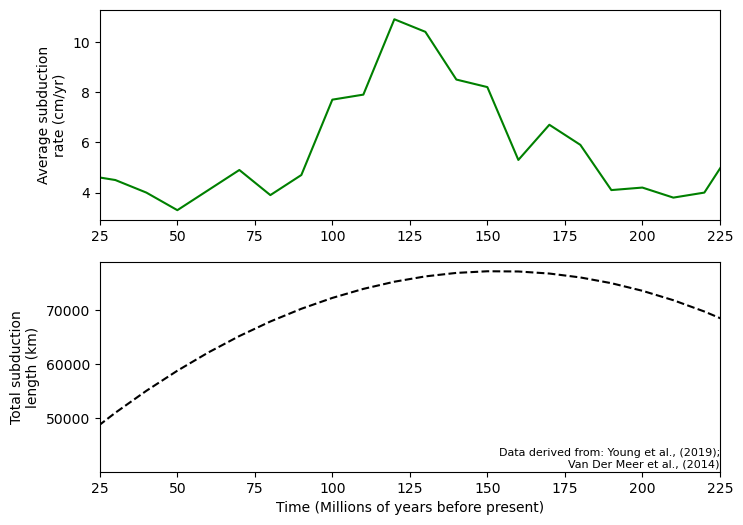

In [141]:
X_var = age_real
Y1_var = rate_real
Y2_var = length_real

fig, axs = plt.subplots(2,1, figsize=(8,6))


ax1=axs[0]
ax2=axs[1]


ax1.plot(X_var, Y1_var, c='green')
ax1.set_xlim(25,225)
ax1.set_ylabel('Average subduction\nrate (cm/yr)')

ax2.plot(X_var, Y2_var, c='black', ls='--')
ax2.set_xlim(25,225)
ax2.set_ylabel('Total subduction\nlength (km)')
ax2.set_xlabel('Time (Millions of years before present)')

ax2.text(225, 41000, 'Data derived from: Young et al., (2019);\nVan Der Meer et al., (2014)', 
         fontsize=8, ha='right')

plt.show()

In [164]:
subduction_water_flux_real =\
    subduction_thickness * subduction_density * subduction_hydration\
    * length_real * km2m * rate_real * cm2m #repeat of the equation in part 1, but now with our "natural" data
        
t_ocean_subduction_real = Mocean / subduction_water_flux_real #repeat of calculation in part 3, assuming Mocean is constant

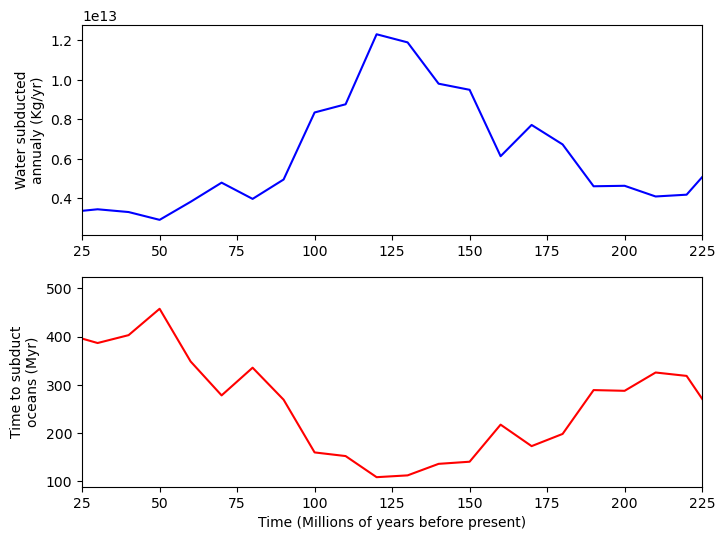

In [136]:
###Plot the results-----------------------

#Define the variables we want plotted for two figures with the same X
X_var = age_real
Y1_var = subduction_water_flux_real
Y2_var = t_ocean_subduction_real/1e6

fig, axs = plt.subplots(2,1, figsize=(8,6))


ax1=axs[0]
ax2=axs[1]


ax1.plot(X_var, Y1_var,c='blue')
ax1.set_xlim(25,225)
ax1.set_ylabel('Water subducted\nannualy (Kg/yr)')

ax2.plot(X_var, Y2_var, c='red')
ax2.set_xlim(25,225)
ax2.set_ylabel('Time to subduct\noceans (Myr)')
ax2.set_xlabel('Time (Millions of years before present)')

plt.show()